In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

Cargando el dataset MNIST...
Mostrando ejemplos del dataset...


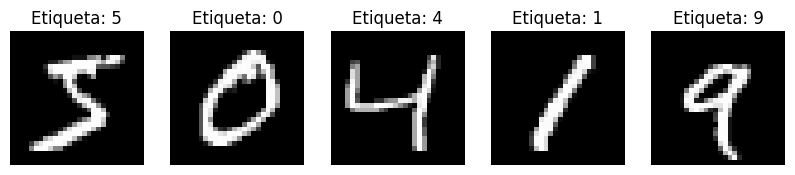

Creando el modelo CNN...


c:\electiva_II_2025\proyecto_estadistica\ProyectoCNN\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando el modelo...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9061 - loss: 0.3059 - val_accuracy: 0.9854 - val_loss: 0.0459
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9860 - loss: 0.0463 - val_accuracy: 0.9868 - val_loss: 0.0366
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9893 - val_loss: 0.0315
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9939 - loss: 0.0211 - val_accuracy: 0.9908 - val_loss: 0.0299
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9949 - loss: 0.0171 - val_accuracy: 0.9919 - val_loss: 0.0270
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9967 - loss: 0.0097 - val_accuracy: 0.9907 - val_loss: 0.0325
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9968 - loss: 0.0102 - val_accuracy: 0.9904 - val_loss: 0.0357
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - ac

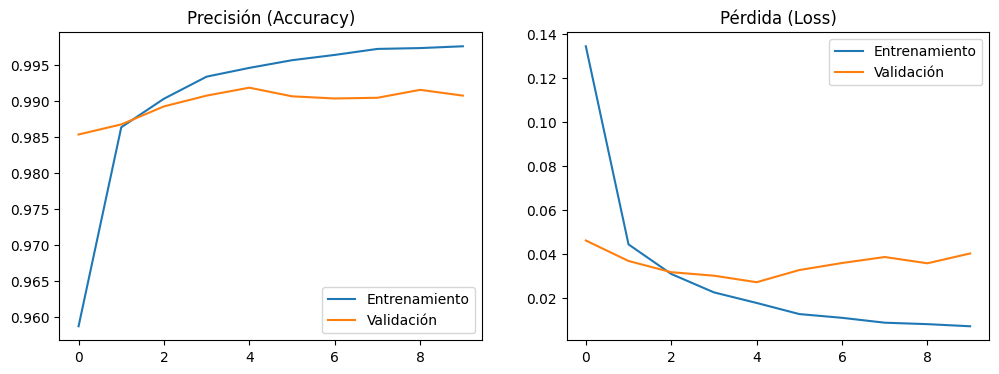

Evaluando el modelo en el conjunto de prueba...

Precisión en Test: 0.9908
Pérdida en Test: 0.0401


In [5]:
# 1. Cargar el dataset MNIST
print("Cargando el dataset MNIST...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Preprocesamiento
x_train = x_train / 255.0
x_test = x_test / 255.0

# Añadir canal (imágenes grises)
x_train = np.expand_dims(x_train, -1)  # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# One-hot encoding de las etiquetas
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 3. Visualizar algunas imágenes
print("Mostrando ejemplos del dataset...")
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(x_train[i].squeeze(), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Etiqueta: {y_train[i]}")
plt.show()

# 4. Crear el modelo CNN
print("Creando el modelo CNN...")
model = Sequential([
    Conv2D(28, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),# Aplanamos la salida de las capas convolucionales
    Dense(128, activation='relu'), # Ajustar la capa densa con un número de neuronas adecuado
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Entrenar el modelo
print("Entrenando el modelo...")
history = model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_test, y_test_cat))

# 6. Graficar resultados
print("Graficando resultados...")

fig2, ax2 = plt.subplots(1, 2, figsize=(12,4))

# Accuracy
ax2[0].plot(history.history['accuracy'], label='Entrenamiento')
ax2[0].plot(history.history['val_accuracy'], label='Validación')
ax2[0].set_title('Precisión (Accuracy)')
ax2[0].legend()

# Loss
ax2[1].plot(history.history['loss'], label='Entrenamiento')
ax2[1].plot(history.history['val_loss'], label='Validación')
ax2[1].set_title('Pérdida (Loss)')
ax2[1].legend()

plt.show()

# 7. Evaluar modelo final
print("Evaluando el modelo en el conjunto de prueba...")
loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nPrecisión en Test: {acc:.4f}")
print(f"Pérdida en Test: {loss:.4f}")

#8. Guardar el modelo
model.save('modelo_cnn_def.keras')